# Sprint 15: Unsupervised learning - clustering

#### Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [50]:
df = pd.read_csv("DelayedFlights.csv")
df.head(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


I will work with Delta Air Lines but before let's clean the data and apply some feature engeneering.

In [5]:
#selecting 
df_flights = df.loc[df['UniqueCarrier'] == 'DL']

In [6]:
#clean the data, feature I will not use, for clustering I will select only numeric features
df_flights.drop(['Unnamed: 0','Year','FlightNum','TailNum','CancellationCode','UniqueCarrier'],axis=1, inplace=True)

In [7]:
df_flights.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
#dealing fith cathegorical variables 'Origin', 'Dest'
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
print(cat_df_flights.isnull().values.sum())#do I have some null values?

0


In [9]:
#list of all airports
first_list = cat_df_flights['Origin'].tolist()
second_list = cat_df_flights['Dest'].tolist()
resultList= list(set(first_list) | set(second_list))
print(resultList)

['HDN', 'BZN', 'RDU', 'STX', 'STT', 'MCI', 'BDL', 'JAX', 'BWI', 'JAN', 'MSP', 'HSV', 'SMF', 'LGA', 'SAV', 'COS', 'JFK', 'EGE', 'TLH', 'SEA', 'ABQ', 'SAN', 'HNL', 'ROC', 'FCA', 'SJU', 'PWM', 'DCA', 'DTW', 'AUS', 'SLC', 'PDX', 'OGG', 'LIT', 'SRQ', 'LEX', 'DEN', 'GSO', 'TPA', 'LIH', 'CLE', 'PHF', 'PNS', 'MKE', 'BUF', 'LAX', 'DFW', 'IAH', 'LAS', 'ANC', 'TYS', 'IAD', 'MTJ', 'PHX', 'OAK', 'CMH', 'IND', 'MEM', 'DAY', 'PBI', 'JAC', 'CAE', 'GPT', 'RSW', 'SNA', 'BOI', 'TUS', 'GUC', 'MSY', 'ORF', 'ORD', 'GSP', 'SAT', 'MIA', 'FAI', 'CAK', 'FLL', 'KOA', 'MOB', 'RNO', 'EWR', 'SDF', 'ELP', 'PHL', 'CHS', 'CVG', 'VPS', 'RIC', 'PIT', 'BHM', 'SJC', 'GEG', 'BOS', 'HOU', 'SFO', 'ATL', 'OKC', 'STL', 'ONT', 'BNA', 'MLB', 'MCO', 'CLT', 'DAB']


In [10]:
labels = resultList
replace_map1 = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map2 = {'Dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [11]:
#apply map to columns Origin and Dest, numbers assigned to airports are the same in both columns
df_flights.replace(replace_map1, inplace=True)
df_flights.replace(replace_map2, inplace=True)
print(df_flights['Origin'],df_flights['Dest'])

95860       9
95861      96
95862      84
95863      49
95864      31
           ..
1936753    11
1936754    88
1936755    96
1936756    52
1936757    73
Name: Origin, Length: 114238, dtype: int64 95860      96
95861      74
95862      96
95863      31
95864       9
           ..
1936753    96
1936754    96
1936755    48
1936756    96
1936757    96
Name: Dest, Length: 114238, dtype: int64


In [12]:
#missing data?
df_flights.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                426
CRSArrTime               0
ActualElapsedTime      510
CRSElapsedTime           0
AirTime                510
ArrDelay               510
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 426
TaxiOut                 17
Cancelled                0
Diverted                 0
CarrierDelay         41986
WeatherDelay         41986
NASDelay             41986
SecurityDelay        41986
LateAircraftDelay    41986
dtype: int64

In [13]:
#calculating mean value for missing data
def myfunc(x):
    df_flights[x]=df_flights[x].fillna(df_flights[x].mean())

mylist = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay',
          'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay',
          'NASDelay','SecurityDelay','LateAircraftDelay']
for x in mylist:
    myfunc(x)

In [14]:
#standartization
scaler = StandardScaler()
dfScaled = df_flights
dfScaled[dfScaled.columns] = scaler.fit_transform(dfScaled[dfScaled.columns])
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


#### Test sample

In [15]:
#simple random sample
df_sample = dfScaled.sample(n = 100)

In [16]:
df_sample.shape

(100, 24)

## Level 1

### Exercise 1

#### Classification of flights with K-means

In [17]:
model1 = KMeans(init="random",n_clusters=4,n_init=10,max_iter=300,random_state=42)
model1.fit(df_sample)

KMeans(init='random', n_clusters=4, random_state=42)

In [18]:
#the lowest SSE value
model1.inertia_

1246.045096994302

In [19]:
#final locations of centroid
model1.cluster_centers_

array([[ 4.78280990e-02, -3.18894021e-01,  6.00927488e-01,
        -7.89862413e-01, -1.13685422e-01, -1.86832125e-01,
        -9.67704210e-01,  3.12898716e-01,  4.05824046e-01,
         3.73277398e-01,  2.58246174e+00,  2.95694156e+00,
        -2.90108605e-01,  4.42541463e-01,  5.64560972e-01,
         6.82442442e-01, -5.22356569e-01, -1.35595187e-02,
        -6.55662939e-02,  4.64082827e+00, -1.86529793e-01,
        -5.36016536e-01, -2.17513799e-02, -7.10433472e-01],
       [-6.58780328e-02,  2.09186617e-01,  2.10092040e-03,
        -1.02716722e+00, -1.10370650e+00, -7.75258649e-01,
        -1.10660689e+00, -3.76973231e-01, -3.63136526e-01,
        -3.53340146e-01, -1.86843258e-01, -1.75836686e-01,
        -2.58858941e-01,  1.86233752e-01, -3.56709118e-01,
        -1.11204321e-01, -1.46081954e-01, -1.35595187e-02,
        -6.55662939e-02,  5.66741336e-02, -1.62299231e-02,
        -1.86814653e-01, -1.39830299e-02, -2.30632075e-01],
       [-1.85326899e-01, -1.59284157e-01,  1.44396342e

In [20]:
#number of iterations required to converge
model1.n_iter_

5

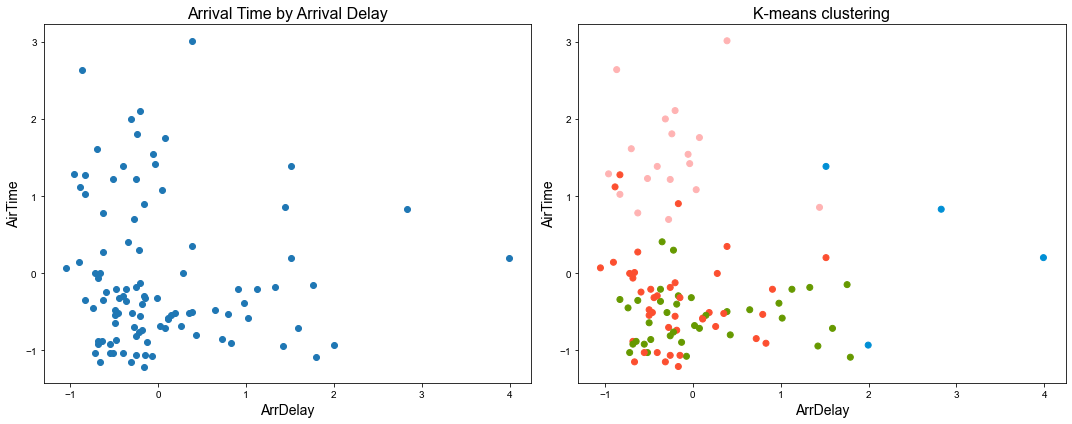

In [21]:
#visualisation of clusters, comparing values raw and clusters output
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

fte_colors1 = {0: "#008fd5",1: "#fc4f30",2: "#ffb3b3", 3:'#669900'}
km_colors = [fte_colors1[label] for label in model1.labels_]

axes[0].scatter(df_sample['ArrDelay'], df_sample['AirTime'])
axes[0].set_xlabel("ArrDelay",fontsize = 14)
axes[0].set_ylabel("AirTime",fontsize = 14)
axes[0].set_title("Arrival Time by Arrival Delay", fontsize = 16)

axes[1].scatter(df_sample['ArrDelay'], df_sample['AirTime'], c=km_colors)
axes[1].set_xlabel("ArrDelay",fontsize = 14)
axes[1].set_ylabel("AirTime",fontsize = 14)
axes[1].set_title("K-means clustering", fontsize = 16)

plt.tight_layout();

## Level 2

### Exercise 2

#### Classification of flights with hierarchical clustering

In [22]:
model2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
model2.fit_predict(df_sample)

array([2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 3, 3, 2, 0, 0, 1, 1, 0,
       1, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1])

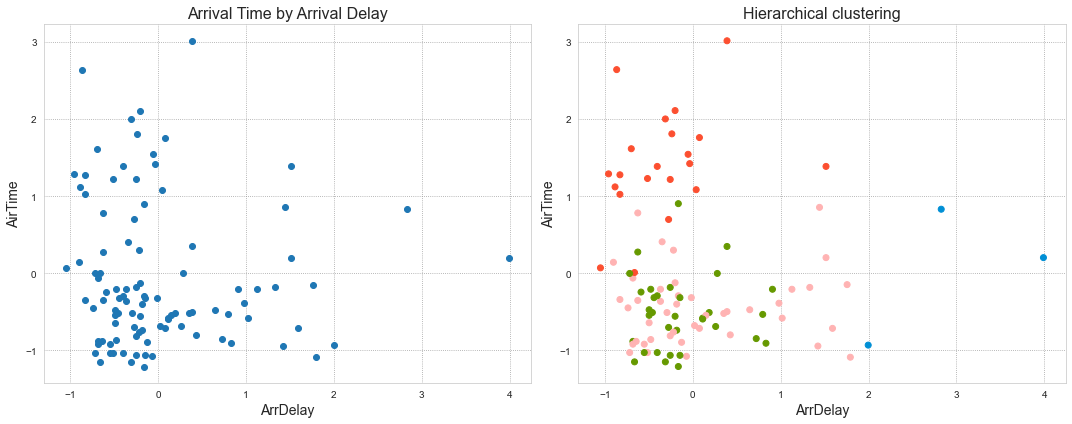

In [23]:
#visualisation of clusters, comparing values raw and clusters output
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

fte_colors2 = {0: "#ffb3b3",1: "#669900",2: "#fc4f30", 3:'#008fd5'}
hie_colors = [fte_colors2[label] for label in model2.labels_]

axes[0].scatter(df_sample['ArrDelay'], df_sample['AirTime'])
axes[0].set_xlabel("ArrDelay",fontsize = 14)
axes[0].set_ylabel("AirTime",fontsize = 14)
axes[0].set_title("Arrival Time by Arrival Delay", fontsize = 16)

axes[1].scatter(df_sample['ArrDelay'], df_sample['AirTime'], c=hie_colors)
axes[1].set_xlabel("ArrDelay",fontsize = 14)
axes[1].set_ylabel("AirTime",fontsize = 14)
axes[1].set_title("Hierarchical clustering", fontsize = 16)

plt.tight_layout();

Conclusion:
- If we divide sample in 4 clusters we can observe that there are some differences between these two types of clustering applied.

## Level 3

### Exercise 3

##### Evaluate the clusters + appropriate number of clusters

#### K-means: Choosing the appropriate number of clusters - Elbow method

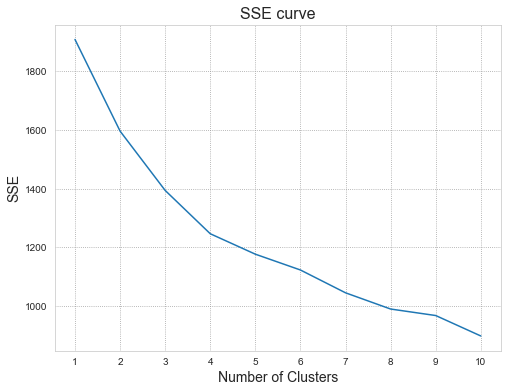

In [24]:
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model1elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model1elbow.fit(df_sample)
    sse.append(model1elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("SSE",fontsize = 14)
plt.show()

Interpretation:
- The elbow is located at x=6, that means we can use 6 clusters for K-means clustering to get the optimum result. However the result is not so straightforward.

In [25]:
#when determining the elbow point in the SSE curve is not so straightforward, use of library kneed
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

#### K-means: Choosing the appropriate number of clusters - Silhouette coefficient

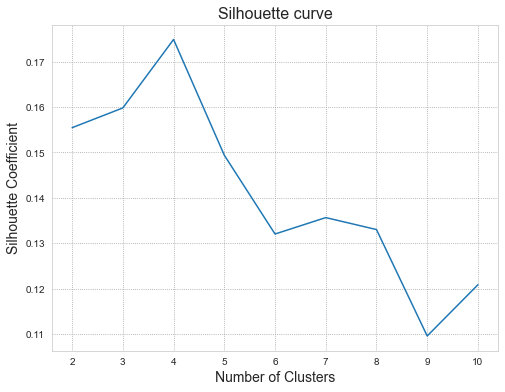

In [26]:
silhouette_coefficients = []
for k in range(2, 11):
    model1silhouette = KMeans(n_clusters=k, **kmeans_kwargs)
    model1silhouette.fit(df_sample)
    score1 = silhouette_score(df_sample, model1silhouette.labels_)
    silhouette_coefficients.append(score1)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title("Silhouette curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("Silhouette Coefficient",fontsize = 14)
plt.show()

Interpretation:
- The maximum of silhouette curve is located at x=2, that means the best number of clusters is 2 and than 6.

#### Hierarchical clustering evaluation

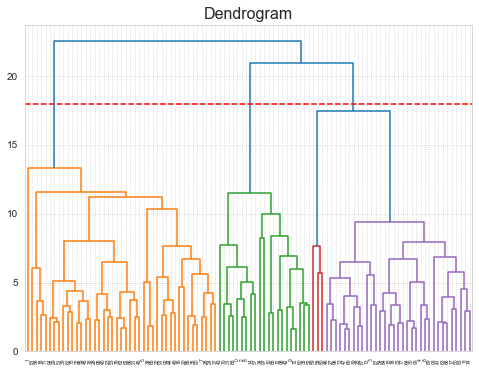

In [27]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 16)  
dend = shc.dendrogram(shc.linkage(df_sample, method='ward'))
plt.axhline(y=18, color='r', linestyle='--')
plt.show()

Interpretation:
- If we choose threshold y=18 the line cuts the dendrogram in 4 points - that indicates the number of clusters. This threshold was applied in first steps.

#### Choosing the appropriate number of clusters - Advanced Techniques

In [28]:
#k-means with 2 clusters
model3 = KMeans(n_clusters=2)
model3.fit(df_sample)
#dbscan - eps is the distance between two samples - neighborhood
model4 = DBSCAN(eps=4)
model4.fit(df_sample)

DBSCAN(eps=4)

In [29]:
#arbitrary assigned numbers to clusters
model3.labels_

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

In [30]:
#arbitrary assigned numbers to clusters
model4.labels_ = abs(model4.labels_)
model4.labels_ 

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [31]:
kmeans_silhouette1 = silhouette_score(df_sample, model3.labels_).round(2)
dbscan_silhouette1 = silhouette_score(df_sample, model4.labels_).round(2)
print(kmeans_silhouette1,dbscan_silhouette1)

0.16 0.22


In [32]:
# selecting the same size for plots and same columns as before so we can compare
a = df_sample['ArrDelay']
b = df_sample['AirTime']

In [33]:
print(a.size, b.size)

100 100


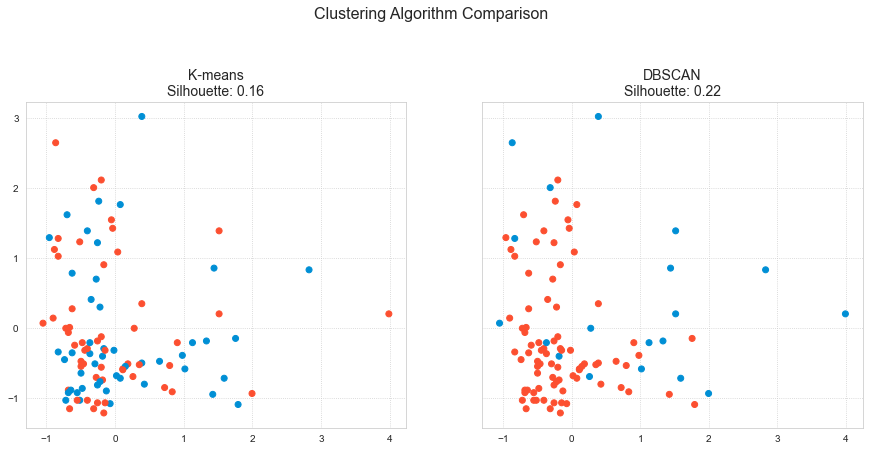

In [34]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=16, y=1.1)
fte_colors1 = {0: "#008fd5",1: "#fc4f30"}
fte_colors2 = {0: "#fc4f30",1: "#008fd5"}

#the kmeans plot
km_colors = [fte_colors1[label] for label in model3.labels_]
ax1.scatter(a, b, c=km_colors)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette1}",fontsize=14)
#the dbscan plot
db_colors = [fte_colors2[label] for label in model4.labels_]
ax2.scatter(a, b, c=db_colors)
ax2.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette1}",fontsize=14)

plt.show()

Interpretation:
- Silhouette coefficient is representing how close or far data pointa are to each other in one cluster. 1 is the best vaule and -1 is the worst.
- DBSCAN appears to have very similar result as K-means.
- Silhouette coefficient is better in K-means than in Density based spacial clustering.

### PCA: Reducing the dimension

We can reduce the whole dataset to 2D and than perform clustering.

In [35]:
dfScaled.head(3)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
95860,-1.616416,-0.089056,-1.017683,0.470116,0.584210,0.523789,0.590595,-0.628063,-0.398670,-0.507976,...,-0.565011,-0.593653,-0.49161,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000
95861,-1.616416,-0.089056,-1.017683,-0.614940,-0.589394,-0.381135,-0.669609,-0.534841,-0.643516,-0.604552,...,-0.537663,-0.129618,0.30779,-0.01356,-0.065566,-7.473814e-02,-1.865298e-01,-0.264767,-0.021751,-0.710433
95862,-1.616416,-0.089056,-1.017683,-1.101493,-1.172777,-0.751497,-0.956218,-0.266827,-0.118846,-0.338969,...,-0.436904,-0.593653,0.55376,-0.01356,-0.065566,-1.048705e-16,-3.581207e-17,0.000000,0.000000,0.000000


In [36]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfScaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [37]:
df_sample2 = principalDf.sample(n = 100)

#### Classification of flights with K-means after rescaling with PCA

In [38]:
#how many clusters?
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

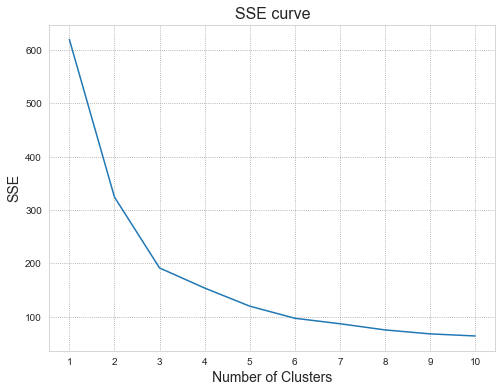

In [39]:
#SSE curve or error to check number of clusters
kmeans_kwargs = {"init": "random","n_init": 10,"random_state": 42}
sse = []
for k in range(1, 11):
    model5elbow = KMeans(n_clusters=k, **kmeans_kwargs)
    model5elbow.fit(df_sample2)
    sse.append(model5elbow.inertia_)

plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("SSE curve", fontsize = 16)
plt.xlabel("Number of Clusters",fontsize = 14)
plt.ylabel("SSE",fontsize = 14)
plt.show()

Conclusion: The best division will be in 3 clusters.

In [40]:
#k-means
model5 = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
model5.fit(df_sample2)

KMeans(init='random', n_clusters=3, random_state=42)

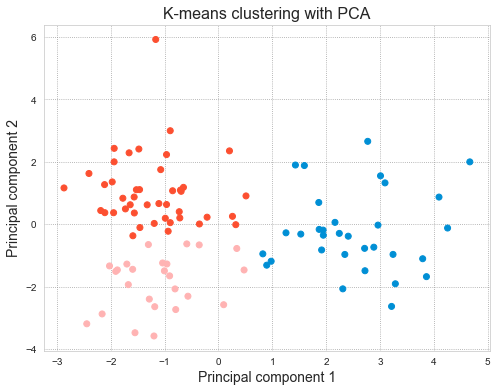

In [41]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors1 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
km_colors2 = [fte_colors1[label] for label in model5.labels_]

plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=km_colors2)
plt.title("K-means clustering with PCA", fontsize = 16)
plt.xlabel("Principal component 1",fontsize = 14)
plt.ylabel("Principal component 2",fontsize = 14)
plt.show()

#### Classification of flights with hierarchical clustering with PCA

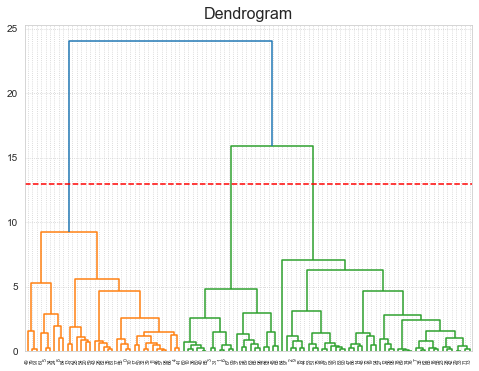

In [42]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": ":"})
plt.rcParams['lines.linewidth'] = 1.5
plt.title("Dendrogram", fontsize = 16)  
dend = shc.dendrogram(shc.linkage(df_sample2, method='ward'))
plt.axhline(y=13, color='r', linestyle='--')
plt.show()

For the value y=13, the threshold line cuts dendrogram in 3 parts - 3 clusters.

In [43]:
model6 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model6.fit_predict(df_sample2)

array([0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2,
       0, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1,
       1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2])

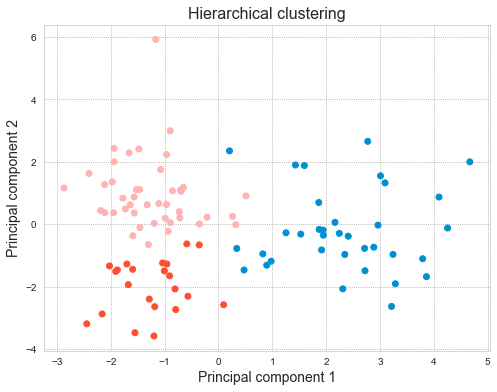

In [44]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors = {0: "#008fd5",1: "#ffb3b3",2: "#fc4f30"}

hie_colors2 = [fte_colors[label] for label in model6.labels_]
plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=hie_colors2)
plt.title("Hierarchical clustering", fontsize = 16)
plt.xlabel("Principal component 1",fontsize = 14)
plt.ylabel("Principal component 2",fontsize = 14)
plt.show()

#### Classification DBSCAN with PCA

In [45]:
#dbscan - eps is the distance between two samples - neighborhood
model7 = DBSCAN(eps=2.3)
model7.fit(df_sample)

DBSCAN(eps=2.3)

In [46]:
model7.labels_ = abs(model7.labels_)
model7.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

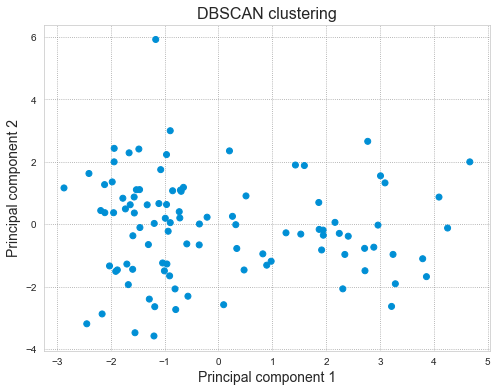

In [47]:
#visualisation of clusters
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})
fte_colors = {0: "#ffb3b3",1: "#008fd5",2: "#fc4f30"}

hie_colors2 = [fte_colors[label] for label in model7.labels_]
plt.scatter(df_sample2['principal component 1'], df_sample2['principal component 2'], c=hie_colors2)
plt.title("DBSCAN clustering", fontsize = 16)
plt.xlabel("Principal component 1",fontsize = 14)
plt.ylabel("Principal component 2",fontsize = 14)
plt.show()

In [48]:
kmeans_silhouette2 = silhouette_score(df_sample2, model5.labels_).round(2)
hierarchical_silhouette2 = silhouette_score(df_sample2, model6.labels_).round(2)
dbscan_silhouette2 = silhouette_score(df_sample2, model7.labels_).round(2)
print(kmeans_silhouette2,hierarchical_silhouette2,dbscan_silhouette2)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
c = df_sample2['principal component 1']
d = df_sample2['principal component 2']

In [ ]:
#plot the data and cluster silhouette comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6), sharex=True, sharey=True)
fig.suptitle("Clustering Algorithm Comparison", fontsize=16, y=1.1)
fte_colors5 = {0: "#fc4f30",1: "#ffb3b3",2: "#008fd5"}
fte_colors6 = {0: "#008fd5",1: "#ffb3b3",2: "#fc4f30"}
fte_colors7 = {0: "#ffb3b3",1: "#008fd5",2: "#fc4f30",3: "#fc4f30"}

#the k-means plot
km_colors = [fte_colors5[label] for label in model5.labels_]
ax1.scatter(c, d, c=km_colors)
ax1.set_title(f"K-means\nSilhouette: {kmeans_silhouette2}",fontsize=14)
#the hierarchical plot
hie_colors = [fte_colors6[label] for label in model6.labels_]
ax2.scatter(c, d, c=hie_colors)
ax2.set_title(f"Hierarchical\nSilhouette: {hierarchical_silhouette2}",fontsize=14)
#the dbscan plot
db_colors = [fte_colors7[label] for label in model7.labels_]
ax3.scatter(c, d, c=db_colors)
ax3.set_title(f"DBSCAN\nSilhouette: {dbscan_silhouette2}",fontsize=14)

plt.show()

Conclusion:
- Hierarchical clustering seems to get lower results than K-means with the same number of clusters. 
- K-means in case of this dataset performes the best silhouette results. That also means that the data in one cluster of thsi model are closer to each other.
- DBSCAN is not performing well because data are more overlapped.

#### Building a K-Means Clustering Pipeline

First I will change the data to have flight-numbers also inside the scaled dataset. Than I will be able to see the cluster assignation to each particular flight.

In [ ]:
#repeting some parts of data processing from before
#selecting 
df_flights = df.loc[df['UniqueCarrier'] == 'DL']

#clean the data, feature I will not use, for clustering I will select only numeric features
df_flights.drop(['Unnamed: 0','Year','TailNum','CancellationCode','UniqueCarrier'],axis=1, inplace=True)

#list of all airports
first_list = cat_df_flights['Origin'].tolist()
second_list = cat_df_flights['Dest'].tolist()
resultList= list(set(first_list) | set(second_list))
labels = resultList

replace_map1 = {'Origin' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
replace_map2 = {'Dest' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

df_flights.replace(replace_map1, inplace=True)
df_flights.replace(replace_map2, inplace=True)
print(df_flights['Origin'],df_flights['Dest'])

#calculating mean value for missing data
def myfunc(x):
    df_flights[x]=df_flights[x].fillna(df_flights[x].mean())

mylist = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay',
          'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay',
          'NASDelay','SecurityDelay','LateAircraftDelay']
for x in mylist:
    myfunc(x)

In [ ]:
x = df_flights.drop('FlightNum',axis=1)
y = df_flights['FlightNum']

In [ ]:
#standartization
scaler = StandardScaler()
dfScaled2 = x
dfScaled2[dfScaled2.columns] = scaler.fit_transform(dfScaled2[dfScaled2.columns])
dfScaled2.head(3)

In [ ]:
#join datasets
df_final = pd.concat([dfScaled2, y], axis=1)
df_final.head(3)

In [ ]:
#new sample of 10 values and changing to arrays
df_sample3 = df_final.sample(n = 10)
data = df_sample3.to_numpy()
data.shape

In [ ]:
x = list(y)
true_label_names = np.array(df_sample3['FlightNum'])
true_label_names.shape

In [ ]:
#converting the abbreviations of labels to integers with LabelEncoder
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

In [ ]:
label_encoder.classes_

In [ ]:
n_clusters = len(label_encoder.classes_)

In [ ]:
#preprocessing pipeline with PCA
preprocessor = Pipeline([("scaler", MinMaxScaler()),("pca", PCA(n_components=2, random_state=42))])

In [ ]:
#k-means clustering with constructor
clusterer = Pipeline([("kmeans",KMeans(n_clusters=3,
                                       init="random",n_init=10,
                                       max_iter=500,random_state=42))])

In [ ]:
#end-to-end pipline
pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])
pipe.fit(data)

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels).round(2)

In [ ]:
true_labels.shape

In [ ]:
predicted_labels.shape

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

In [ ]:
plt.figure(figsize=(8, 6)) 
sns.set_style('whitegrid', {"grid.color": ".6", "grid.linestyle": ":"})

pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"])

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2")

scat.set_title("Clustering results from Delta Air Lines Flights", fontsize=16 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Conclusion:
- Pipline can help to do several steps together: PCA, clustering and fitting data.
- The diagram showing each flight assignation would be interesting for further study - for exemple we could compare flight samples of two and more companies.
- Also with this diagram, we could study un more detail the characteristics of each cluster.

#### Notes
* ML Unsupervised algorithms
    - https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
* K-Means and evaluation techniques
    - https://realpython.com/k-means-clustering-python/
* Hierarchical Agglomerative Clustering
    - https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
    - https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
* PCA
    - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    - https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html